# Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import sklearn as sk
import keras
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Reading the Dataset

In [2]:
# load dataset
df = pd.read_csv("./dataset_website.csv")
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

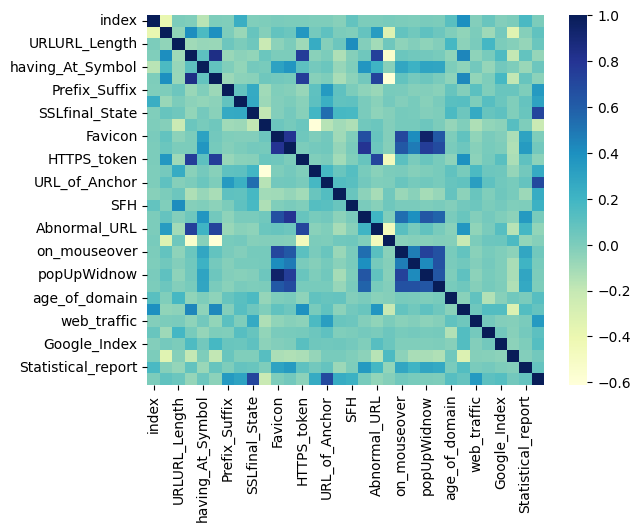

In [4]:
# correlation heatmap
hmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

# Handling Null Values

In [5]:
df = df.dropna()

# Feature Selection

In [6]:
X = df.drop(['index','Domain_registeration_length','Favicon','port','SFH','Abnormal_URL','Redirect','on_mouseover','RightClick','popUpWidnow','Iframe','web_traffic','Page_Rank','Google_Index','Links_pointing_to_page','Statistical_report','Result'],axis=1)
y = df['Result']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_IPhaving_IP_Address  11055 non-null  int64
 1   URLURL_Length               11055 non-null  int64
 2   Shortining_Service          11055 non-null  int64
 3   having_At_Symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   Prefix_Suffix               11055 non-null  int64
 6   having_Sub_Domain           11055 non-null  int64
 7   SSLfinal_State              11055 non-null  int64
 8   HTTPS_token                 11055 non-null  int64
 9   Request_URL                 11055 non-null  int64
 10  URL_of_Anchor               11055 non-null  int64
 11  Links_in_tags               11055 non-null  int64
 12  Submitting_to_email         11055 non-null  int64
 13  age_of_domain               11055 non-null  int64
 14  DNSRec

In [8]:
print(X.shape)
print(y.shape)

(11055, 15)
(11055,)


# Splitting Dataset

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8291, 15)
(8291,)
(2764, 15)
(2764,)


# Linear SVM

In [11]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
Y = clf.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, Y)
score=round(score,2)*100
print("accuracy = "+str(score)+"%")

accuracy = 93.0%


# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=None)
classifier.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = classifier.predict(x_test)
print(y_pred)

[-1  1  1 ...  1  1  1]


In [15]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, y_pred)
score=round(score,2)*100
print("accuracy = "+str(score)+"%")

accuracy = 92.0%


# Pickle Dump

In [18]:
pickle.dump(clf, open("./webPhishingDetectorSVM.pkl",'wb'))

In [19]:
saved_model2 = pickle.load(open("./webPhishingDetectorSVM.pkl", 'rb'))
result = saved_model2.score(x_test, y_test)
print(result*100)

93.05354558610709


# Address based features

In [7]:
url = "https://www.youtube.com/watch?v=tsxmyL7TUJg"
l = url.split("/")
print(l)

['https:', '', 'www.youtube.com', 'watch?v=tsxmyL7TUJg']


In [8]:
# 1.detecting ip addr
if(l[2][:3].isalpha()):
    res=1
else:
    res=0
    
print(res)

1


In [9]:
# 2.detecting long url
if(len(url)>75):
    res=-1
elif(len(url)>=54 and len(url)<=75):
    res=0
else:
    res=1

print(res)

1


In [17]:
# 3.detecting tinyurl and bit.ly
if(("tinyurl" in url) or ("bit.ly" in url)):
    res=-1
else:
    res=1
    
print(res)

1


In [10]:
# 4.detecting @ symbol
if('@' in url):
    res=-1
else:
    res=1

print(res)

1


In [11]:
# 5.detecting // redirect
l=url.split("//")
if(len(l)>2):
    res=-1
else:
    res=1
print(res)

1


In [12]:
# 6.detecting prefix-suffix
l=url.split(".")
print(l)
if("-" in l[1]):
    res=1
else:
    res=-1
print(res)

['https://www', 'youtube', 'com/watch?v=tsxmyL7TUJg']
-1


In [16]:
# 7.detecting sub domains
l=url.split("/")
print(l)
m=l[2].split(".")
print(m)

if(len(m)==3):
    res=1
elif(len(m)==4):
    res=0
elif(len(m)>4):
    res=-1

print(res)

['https:', '', 'www.youtube.com', 'watch?v=tsxmyL7TUJg']
['www', 'youtube', 'com']
1


In [13]:
# 8.detecting https
l=url.split(".")
print(l)
if("https" in l[0]):
    res=1
else:
    res=-1
print(res)

['https://www', 'youtube', 'com/watch?v=tsxmyL7TUJg']
1


In [20]:
# 12.detecting https in domain
l=url.split("//")
print(l)
if("https" in l[1]):
    res=-1
else:
    res=1
print(res)

['https:', 'www.youtube.com/watch?v=tsxmyL7TUJg']
1


# Domain based features

In [36]:
import whois
import datetime

In [37]:
# 1.age of domain
l=url.split("/")
print(l)

['https:', '', 'www.youtube.com', 'watch?v=tsxmyL7TUJg']


In [38]:
info = whois.whois(l[2])

In [39]:
today = datetime.date.today()
date = today.strftime("%Y-%m-%d")
print("today = ", date)

today =  2022-11-12


In [40]:
cd = str(info.creation_date).split("-")
td = date.split("-")
age = int(td[0])-int(cd[0])
print(age)

17


In [41]:
if(age>1):
    res=1
else:
    res=-1
print(res)

1


In [42]:
print(info)

{
  "domain_name": [
    "YOUTUBE.COM",
    "youtube.com"
  ],
  "registrar": "MarkMonitor, Inc.",
  "whois_server": "whois.markmonitor.com",
  "referral_url": null,
  "updated_date": "2022-01-14 09:38:42",
  "creation_date": "2005-02-15 05:13:12",
  "expiration_date": [
    "2023-02-15 05:13:12",
    "2023-02-15 00:00:00"
  ],
  "name_servers": [
    "NS1.GOOGLE.COM",
    "NS2.GOOGLE.COM",
    "NS3.GOOGLE.COM",
    "NS4.GOOGLE.COM",
    "ns2.google.com",
    "ns3.google.com",
    "ns1.google.com",
    "ns4.google.com"
  ],
  "status": [
    "clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited",
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited",
    "serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",
    "serverUpdateProhibited https://icann.org/epp#serverUpdateProhibited"

In [43]:
# 2.dns record check
if(len(info.name_servers)>0):
    res=1
else:
    res=-1
print(res)

1
